<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/CNN_version2_Pytorch_nivel_medio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN para clasificación de dígitos usando Pytorch (nivel medio de complejidad)

En esta segundo notebook se implementará la misma red neuronal creada en [CNN con TF y Keras](https://github.com/TottiPuc/Machine_learning/blob/master/CNN_version1_TF_y_keras_nivel_bajo.ipynb) pero esta vez usando el framework pytorch para hacer una clasificación de digitos del dataset MNIST

la arquitectura es:

*  una capa de entrada con 784 neurones, la cual recibira cada imágen de 28x28
*  una capa ocúlta de 128 neurones con función de activacion ReLu
*  una capa ocúlta de 64 neurones con funcion de activacion ReLu
*  una capa de salida con 10 neurones la cual definirá que dígito es el indicado para la clasificación con una funcion de activación sotfmax

#Cargando paquetes principales

In [0]:
# instalamos el framework pytorch
!pip install -q torchvision
!pip install -q torch
!pip install -q -U watermark

In [0]:
#cargamos os paquetes necesarios
import time
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [5]:
#versiones de los paquetes
%reload_ext watermark
%watermark -a "Christian Arcos Gordillo" --iversion

matplotlib  3.2.1
torchvision 0.5.0
torch       1.4.0
numpy       1.18.2
Christian Arcos Gordillo


###Preparación de datos 

Lo primero es normalizar los datos para eso antes de cargar el dataset de MNIST creamos la función de normalización que esta incorporada en el framework pytorch
esta funcion toma el conjunto de entrada en este caso eldataset lo conveierte a tensor y aplica una nomalización en el siguiente caso con media 0.5 y desviación estandar de 0.5

In [0]:
#funcion para transformar los datos al momento de importarlos
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

Ahora descargamos el dataset lo mezclamos en el proceso y lo transformamos, esta descarga genera el conjunto de datos y un muestreador el cual ofrece iteradores de proceso único o multiproceso sobre el dataset

In [8]:
#cargando los datos de entrenamiento
data_train = torch.utils.data.DataLoader(datasets.MNIST('data',    #carpeta donde se almacenaran los datos
                                                        train = True,    # solo solicito los datos de entrenamiento
                                                        download=True,
                                                        transform=transform),
                                                        batch_size=64,  # para generar varios lotes de 64 imagenes para no sobrecargar la memoria
                                                        shuffle=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


In [0]:
#cargando los datos de teste
data_test = torch.utils.data.DataLoader(datasets.MNIST('data',    #carpeta donde se almacenaran los datos
                                                        train = False,    # solo solicito los datos de teste
                                                        download=True,
                                                        transform=transform),
                                                        batch_size=64,  # para generar varios lotes de 64 imagenes para no sobrecargar la memoria
                                                        shuffle=True)

Verificamos la carga de datos

In [10]:
#como la carga de datos ofrece un iterador de cada lote con el tamaño que definimos entonces utiliamos la funcion iterador para obtener ese lote
dataiter = iter(data_train)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
# esto nos entrega un lote de 64 imagenes diciendo que es 1 lote de 28 x 28

torch.Size([64, 1, 28, 28])
torch.Size([64])


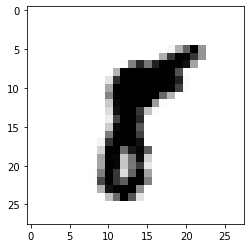

In [11]:
# visualizamos una imágen
plt.imshow(images[0].numpy().squeeze(), cmap= 'gray_r')

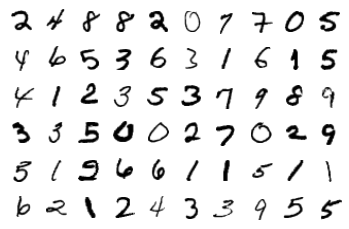

In [13]:
#visualizamos varias imágenes
figure =plt.figure()
num_of_images = 60
for i in range(1,num_of_images+1):
  plt.subplot(6,10, i)
  plt.axis('off')
  plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')

##Creando la arquitectura de la red

hiperparametros de la red

In [0]:
input_size=784    # 28x28
hidden_sizes = [128,64]  # número de neurones de las capas ocultas
output_size = 10

Creamos el modelo

In [0]:
model_pt=nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),  #784 x 128
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]), # 128 x 64
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1],output_size), #64 x 10
                       nn.LogSoftmax(dim=1))

In [16]:
print(model_pt)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


Creamos las funciones de optimización del modelo esto es:
*    la función de coste

In [0]:
#función de coste
coste = nn.NLLLoss()

# obteniendo los lotes de los datos
images,labels = next(iter(data_train))

# ajustando el shape de cada lote
images = images.view(images.shape[0],-1)    # tendremos las 64 imagenes de cada lote con 784 registros que son el resultado de 28x28

# calculamos los logaritmos de las probabilidades de cada clase
logs = model_pt(images)

# calculamos las perdidas

loss = coste(logs,labels)

A modo de ejemplo antes de entrenar la red se realiza la extracción de un peso del modelo ya creado peor no entrenado y que pasa cuadno el pasa por la función backpropagation osea la encargada de actualizar los pesos

In [21]:
print("\n Antes del backpropagation \n ", model_pt[0].weight.grad)
loss.backward()
print("\n Despues del backpropagation \n ", model_pt[0].weight.grad)


 Antes del backpropagation 
  None

 Despues del backpropagation 
  tensor([[ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        ...,
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


##Entrenamiento
que es el que realizará toda la etapa de actualización de pesos el paso anterior mostrado solo que multiples veces

In [22]:
#optimizador
optimizer = optim.SGD(model_pt.parameters(),lr=0.003, momentum=0.9)

#numero de epocas
epochs=10

#loop de entrenamiento
for e in range(epochs):
  #registro el momento de cada epoca
  start_time =time.time()

  # iniciamos en cero el erro de cada epoca 
  running_loss =0

  # creamos el loop para las imagenes y labels
  for images,labels in data_train:

    #realizamos el flatten da cada imagen
    images = images.view(images.shape[0], -1)

    #paso de entrenamiento
    optimizer.zero_grad()

    output = model_pt(images)
    loss = coste(output,labels)

    #es en este punto donde ocurre el aprendizaje con backpropagation
    loss.backward()

    # y aqui es donde optimizamos los pesos
    optimizer.step()

    running_loss += loss.item()
  else:
    print('Epoca {0}, tiempo de entrenamiento {1:.2f}, Loss(Error): {2}'.format(e, time.time() - start_time, running_loss/len(data_train)))

Epoca 0, tiempo de entrenamiento 10.04, Loss(Error): 0.6574998561348488
Epoca 1, tiempo de entrenamiento 9.81, Loss(Error): 0.28228232339580556
Epoca 2, tiempo de entrenamiento 9.76, Loss(Error): 0.21965620497555366
Epoca 3, tiempo de entrenamiento 9.76, Loss(Error): 0.18008026869487026
Epoca 4, tiempo de entrenamiento 9.73, Loss(Error): 0.150278440748117
Epoca 5, tiempo de entrenamiento 9.71, Loss(Error): 0.1295159752828194
Epoca 6, tiempo de entrenamiento 9.76, Loss(Error): 0.11332946165856014
Epoca 7, tiempo de entrenamiento 9.68, Loss(Error): 0.10079149338803979
Epoca 8, tiempo de entrenamiento 9.76, Loss(Error): 0.08986265654328154
Epoca 9, tiempo de entrenamiento 9.70, Loss(Error): 0.0829228276187288


##Evaluación del modelo

In [0]:
#función para visualizar la clasificación
def vizualizar(img,ps):
  ps=ps.data.numpy().squeeze()
  fig, (ax1,ax2) = plt.subplots(figsize = (6,9),ncols= 2)
  ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
  ax1.axis('off')
  ax2.barh(np.arange(10),ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(np.arange(10))
  ax2.set_title('Probabilidad de cada clase')
  ax2.set_xlim(0, 1.1)
  plt.tight_layout()

el digito predicho es  2


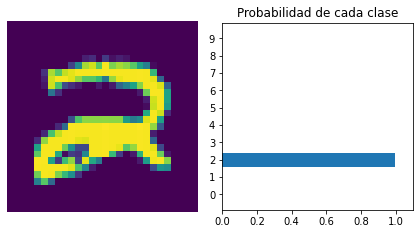

In [24]:
#obtenemos una imagen de teste
images,labels = next(iter(data_test))

#ajustamos la imágen
img = images[0].view(1,784)

# realizamos la predicción con la imagen
with torch.no_grad():
  logs = model_pt(img)

#logaritmos de probabilidad de la prediccion
ps = torch.exp(logs)
probabilidad = list(ps.numpy()[0])

print("el digito predicho es ", probabilidad.index(max(probabilidad)))

#visualizamos la clase
vizualizar(img.view(1,28,28),ps)


Como se puede ver en la enterio prueba el sistema esta reconociendo perfectamente, quiere decir que se ajusto bien a los datos de entrenamiento pero esot solo fue para una sola imágen, vamos a encontrar la tasa de precisión con todo el conjunto de teste

In [26]:
#evaluando el modelo
correct_count, all_count=0,0
for images,labels in data_test:
  for i in range(len(labels)):
    img = images[i].view(1,784)
    with torch.no_grad():
      logs = model_pt(img)
    ps = torch.exp(logs)
    probabilidad = list(ps.numpy()[0])
    pred_label= probabilidad.index(max(probabilidad))
    true_label = labels.numpy()[i]
    if (true_label == pred_label):
      correct_count += 1
    all_count += 1

print("\nNúmero de imágenes evaluadas =", all_count)
print("\Precisión del modelo con los datos de teste =", (correct_count/all_count))


Número de imágenes evaluadas = 10000
\Precisión del modelo con los datos de teste = 0.9707


In [0]:
#guardamos nuestro modelo
torch.save(model_pt,"modelo_pt.pt")